In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



import os
for dirname, _, filenames in os.walk("C:\\Users\\91876\\Desktop\\project\\resume project\\cric insight"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\91876\Desktop\project\resume project\cric insight\Bowling_ODI.csv
C:\Users\91876\Desktop\project\resume project\cric insight\Bowling_t20.csv
C:\Users\91876\Desktop\project\resume project\cric insight\Bowling_test.csv
C:\Users\91876\Desktop\project\resume project\cric insight\cric_project final.ipynb
C:\Users\91876\Desktop\project\resume project\cric insight\Fielding_ODI.csv
C:\Users\91876\Desktop\project\resume project\cric insight\Fielding_t20.csv
C:\Users\91876\Desktop\project\resume project\cric insight\Fielding_test.csv
C:\Users\91876\Desktop\project\resume project\cric insight\ODI data.csv
C:\Users\91876\Desktop\project\resume project\cric insight\t20.csv
C:\Users\91876\Desktop\project\resume project\cric insight\test.csv


In [2]:
#To load the dataset
file_mapping={"T20": "C:\\Users\\91876\\Desktop\\project\\resume project\\cric insight\\t20.csv", "ODI": "C:\\Users\\91876\\Desktop\\project\\resume project\\cric insight\\ODI data", "Test": "C:\\Users\\91876\\Desktop\\project\\resume project\\cric insight\\test.csv"}
format_choice = "T20"  # Change this to "ODI" or "Test" as needed
data = pd.read_csv(file_mapping[format_choice], na_values=['-', 'NA', ''])

# Remove columns that include "Unnamed" in their names
data=data.loc[:, ~data.columns.str.contains("Unnamed")]

In [3]:
# Dataset Overview
print(f"{format_choice} Dataset Overview")
print(f"Dataset Dimensions: {data.shape[0]} rows and {data.shape[1]} columns")
print("Data Types:")
print(data.dtypes)
print("Missing Values per Column:")
print(data.isnull().sum())
print(data.head())
print("Summary Statistics:")
print(data.describe())

T20 Dataset Overview
Dataset Dimensions: 2006 rows and 15 columns
Data Types:
Player     object
Span       object
Mat         int64
Inns      float64
NO        float64
Runs      float64
HS         object
Ave       float64
BF        float64
SR        float64
100       float64
50        float64
0         float64
4s        float64
6s        float64
dtype: object
Missing Values per Column:
Player      0
Span        0
Mat         0
Inns      152
NO        152
Runs      152
HS        152
Ave       328
BF        152
SR        175
100       152
50        152
0         152
4s        152
6s        152
dtype: int64
                   Player       Span  Mat   Inns    NO    Runs   HS    Ave  \
0         V Kohli (INDIA)  2010-2019   75   70.0  20.0  2633.0  94*  52.66   
1       RG Sharma (INDIA)  2007-2019  104   96.0  14.0  2633.0  118  32.10   
2         MJ Guptill (NZ)  2009-2019   83   80.0   7.0  2436.0  105  33.36   
3  Shoaib Malik (ICC/PAK)  2006-2019  111  104.0  30.0  2263.0   75  30.58  

In [4]:
# Selecting Features
features = ["Mat", "Inns", "NO", "BF", "SR"]
target = "Runs"
features = [feature for feature in features if feature in data.columns]

# Normalize column names for consistency
data.columns = data.columns.str.strip().str.lower()  # Remove whitespace and convert to lowercase
features = [feature.lower() for feature in features]  # Normalize features list
target = target.lower()  # Normalize target name

In [5]:
if all(feature in data.columns for feature in features + [target]):
    # Prepare data
    X = data[features]
    y = data[target]

    # Handle missing values
    X.fillna(0, inplace=True)  # Replace NaN in features with 0
    y.fillna(y.mean(), inplace=True)  # Replace NaN in target with mean

    # Categorical Encoding (if applicable)
    categorical_columns = X.select_dtypes(include=['object']).columns
    if not categorical_columns.empty:
        print("Categorical features detected. Applying one-hot encoding.")
        X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

C:\Users\91876\AppData\Local\Temp\ipykernel_23356\1783280974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Replace NaN in features with 0


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

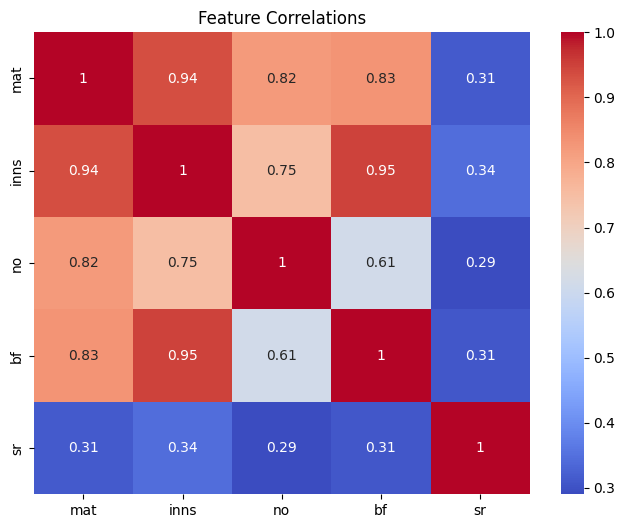

In [7]:
# Check for multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [8]:
# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Predictions
predictions = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Adjusted R² Score: {adj_r2:.2f}")

Model Performance
Mean Squared Error (MSE): 612.49
Mean Absolute Error (MAE): 6.07
R² Score: 0.99
Adjusted R² Score: 0.99


Feature Importance
  Feature  Importance
3      bf    0.981650
1    inns    0.010372
4      sr    0.006653
0     mat    0.000865
2      no    0.000460


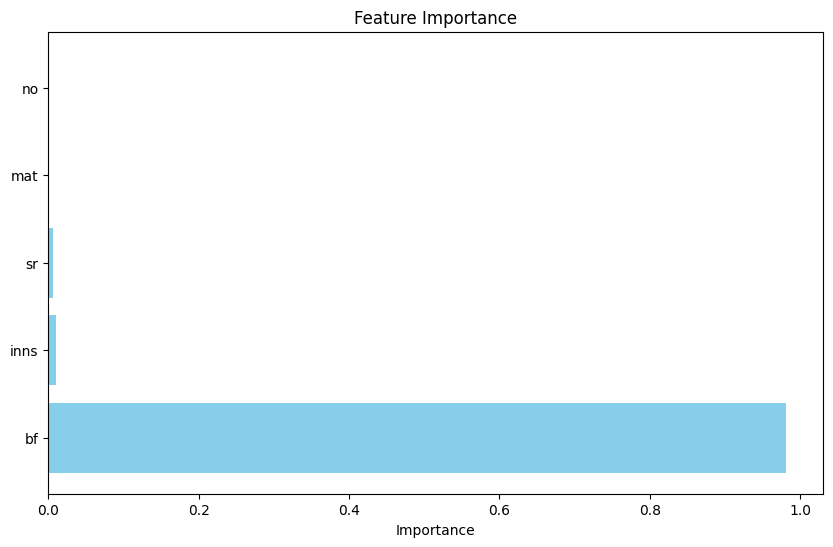

In [10]:
# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

Exploratory Data Analysis


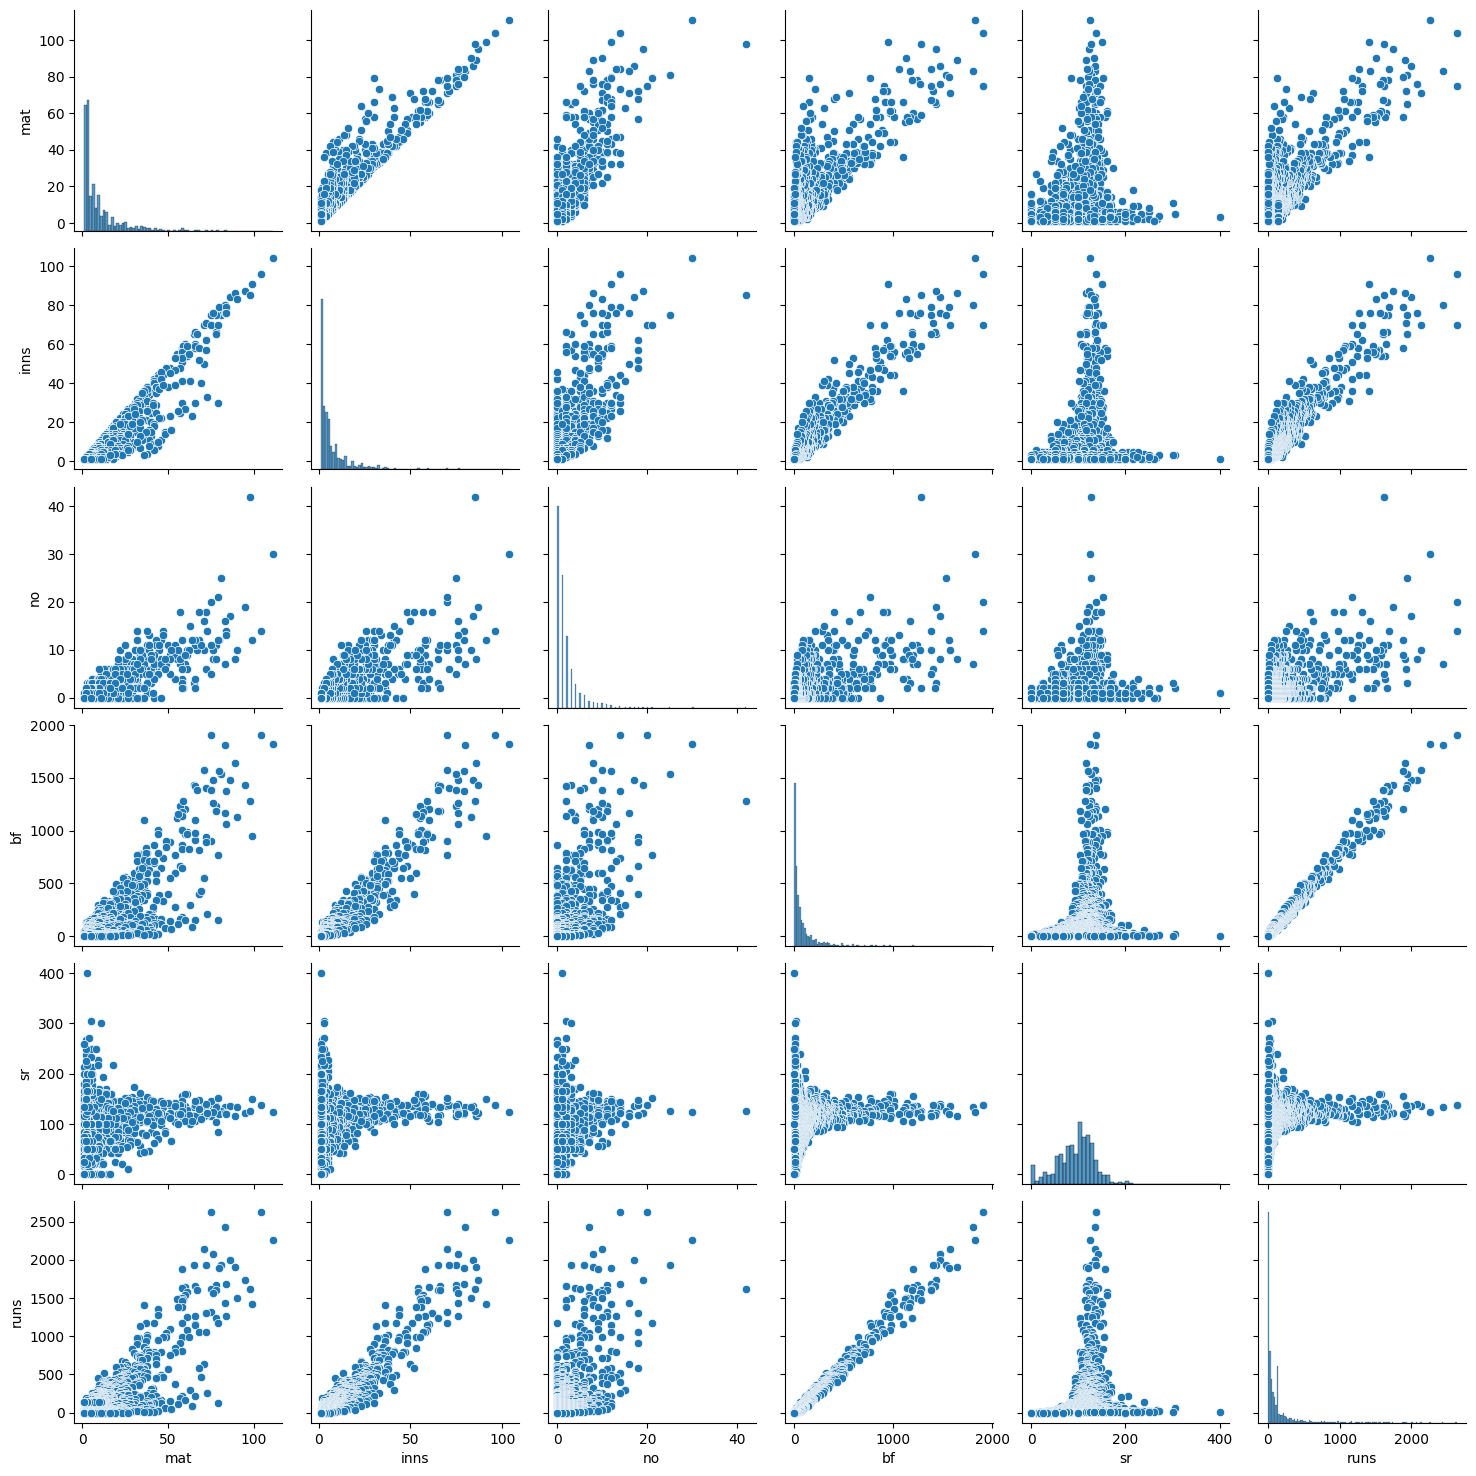

In [11]:
# EDA: Pairplot
print("Exploratory Data Analysis")
pairplot_data = data[features + [target]]  # Ensure you include the target variable
sns.pairplot(pairplot_data)
plt.show()

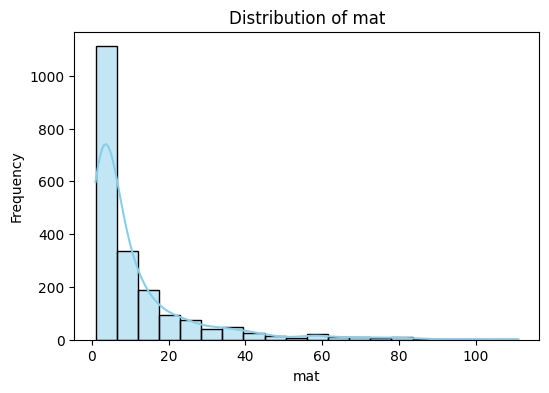

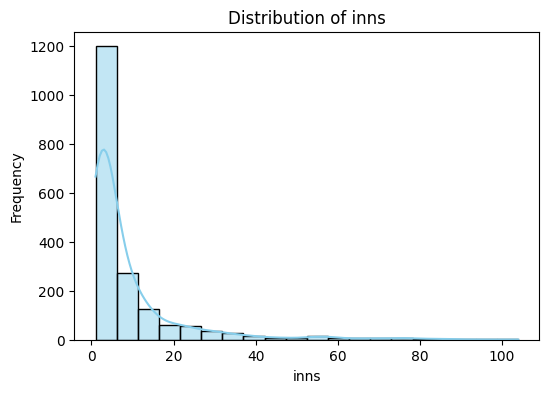

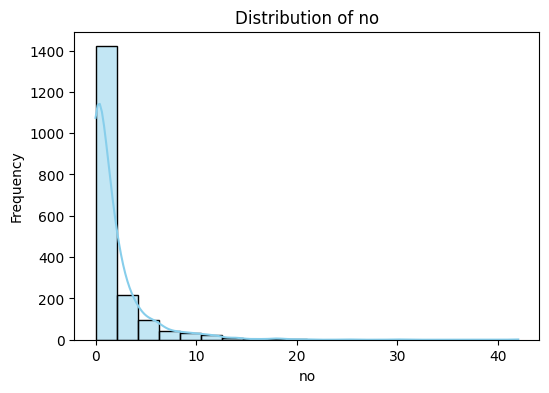

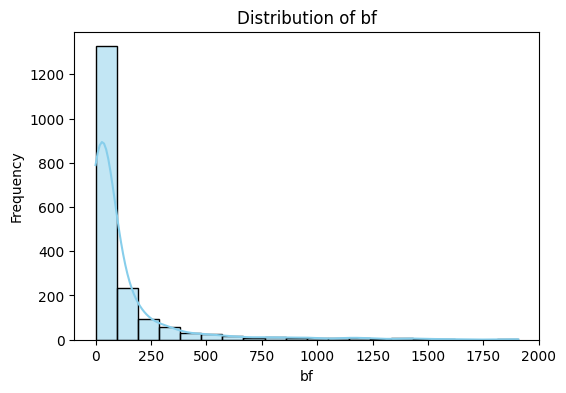

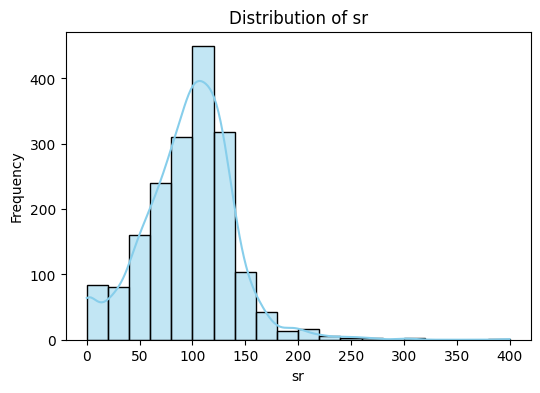

In [12]:
# Additional EDA: Histograms
for column in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=20, color="skyblue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

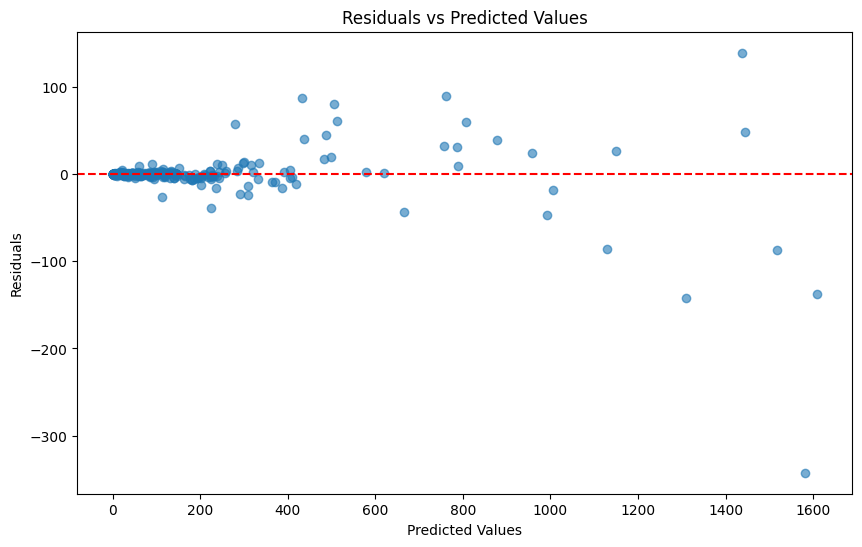

In [13]:
# Residual Analysis
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()